In [3]:
import cv2
import numpy as np
from commonfunctions import *


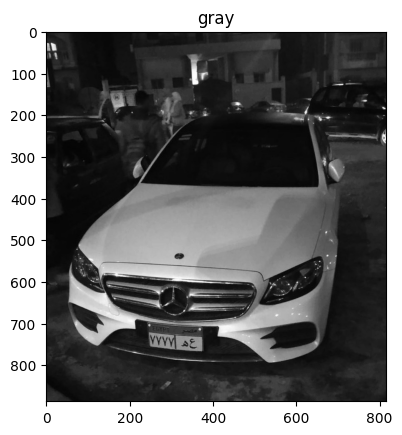

In [21]:
image = cv2.imread("Dataset\\Vehicles\\0097.jpg")  # Load your image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
show_images([gray], ["gray"])

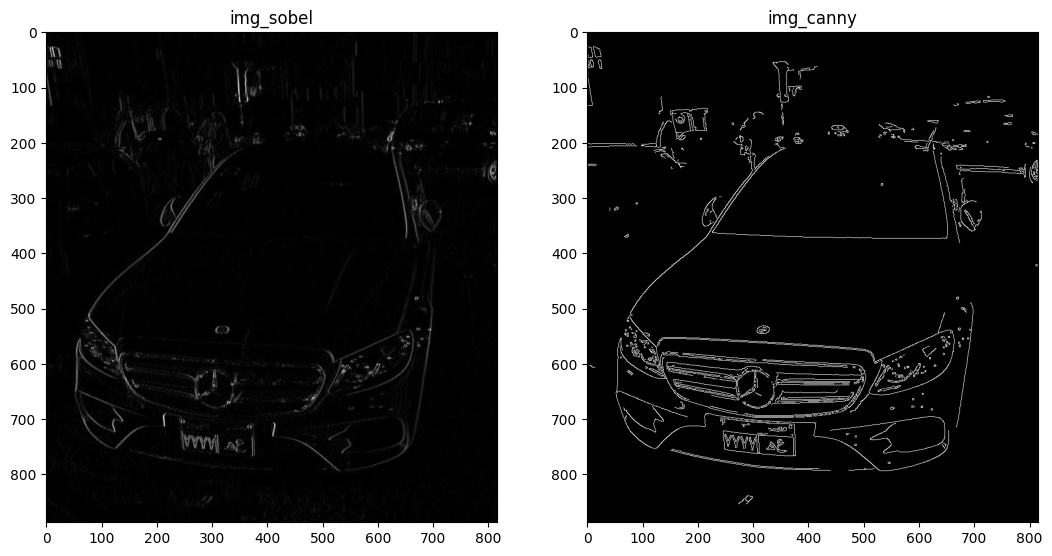

In [24]:
img_sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_abs = np.absolute(img_sobel)
img_canny = cv2.Canny(gray, 100, 200)

img_sobel_normalized = cv2.normalize(img_sobel_abs, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
show_images([img_sobel_normalized,img_canny], ["img_sobel","img_canny"])

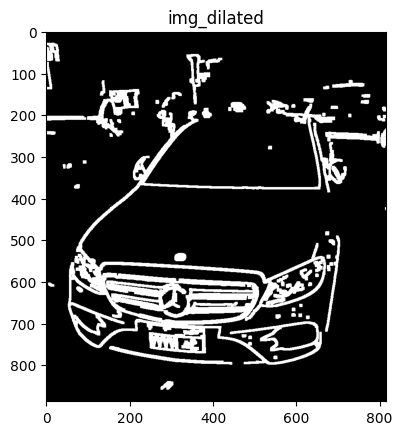

In [26]:
img_dilated = cv2.dilate(img_canny, np.ones((2, 2), np.uint8), iterations=5)

show_images([img_dilated], ["img_dilated"])

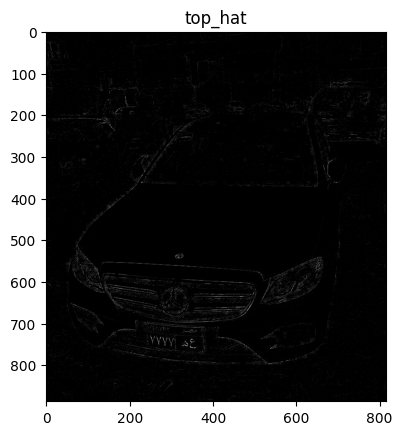

In [29]:
gray_enhanced = cv2.equalizeHist(gray)
top_hat = cv2.morphologyEx(gray_enhanced, cv2.MORPH_BLACKHAT, np.ones((3, 3), np.uint8))
show_images([top_hat], ["top_hat"])


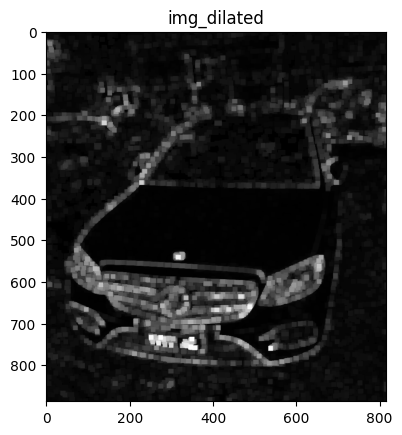

In [34]:
width_kernel = 3
height_kernel = 3
img_dilated = cv2.dilate(top_hat, np.ones((width_kernel, height_kernel), np.uint8), iterations=5)

show_images([img_dilated], ["img_dilated"])

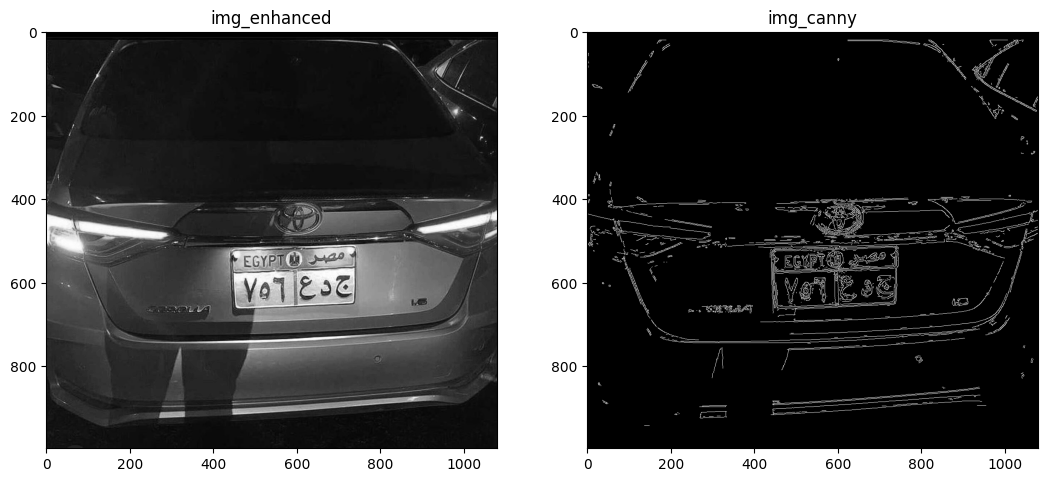

117


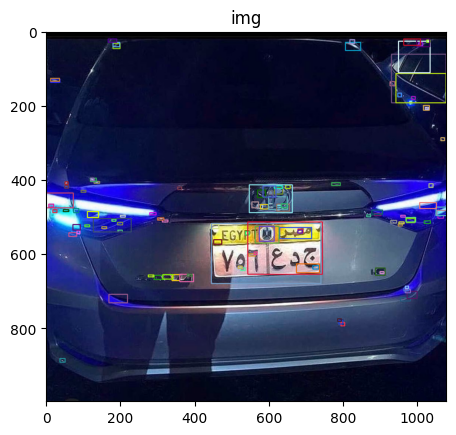

In [ ]:
img = cv2.imread("Dataset\\Vehicles\\0100.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_canny = cv2.Canny(img_gray, 150, 200)
contours,_ = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
show_images([img_gray,img_canny], ["img_enhanced","img_canny"])
plate_contour = None
filtered_contours = []
#sort contours by area
bounding_boxes = [cv2.boundingRect(contour) for contour in contours]

for contour in bounding_boxes:
    x, y, w, h = contour
    aspect_ratio = w / h
    area = w * h
    if aspect_ratio >= 1 and aspect_ratio <= 3 and area >= 50:
        filtered_contours.append(contour)
print(len(filtered_contours))
        
if filtered_contours:
    #draw each contour in a different color
    for i in range(len(filtered_contours)):
        #pick random color
        color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
        curr_contour = filtered_contours[i]
        #get bounding box
        x, y, w, h = curr_contour
        # make a rectangle around the contour
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)  
    #get max contour
    
show_images([img], ["img"])

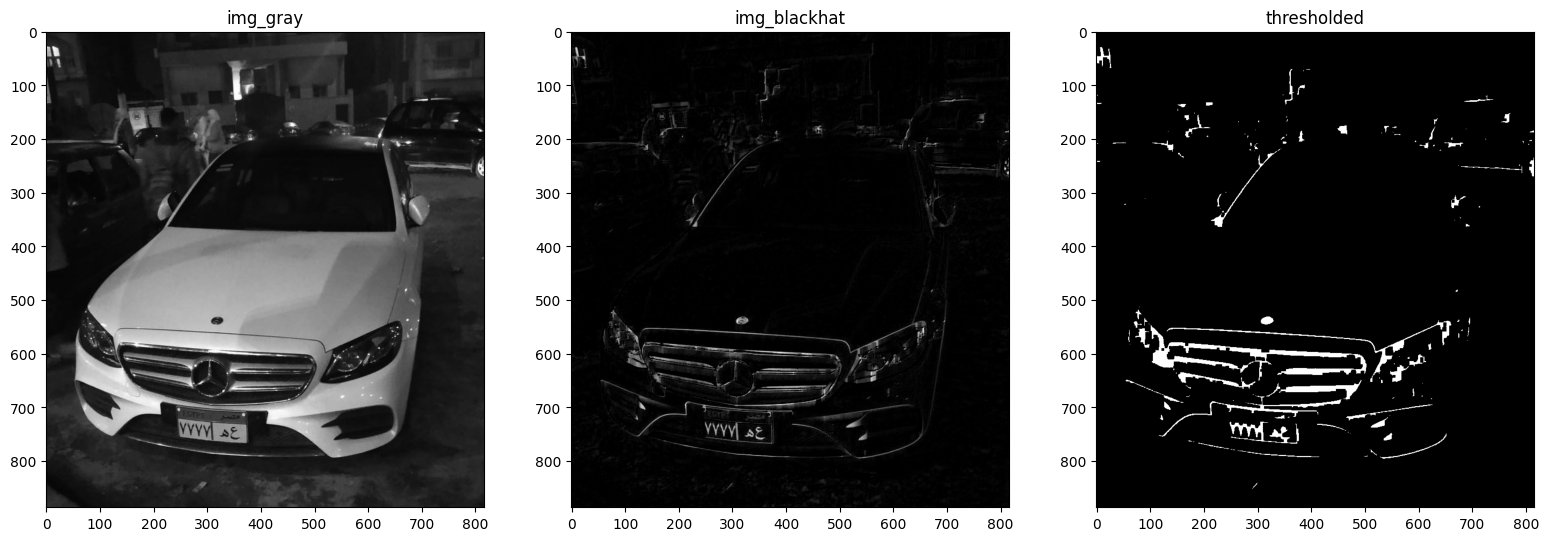

In [168]:
img = cv2.imread("Dataset\\Vehicles\\0097.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blackhat = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, np.ones((12, 6), np.uint8))
img_closed = cv2.morphologyEx(img_blackhat, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8),iterations=2)
thresholded = cv2.threshold(img_closed, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
show_images([img_gray,img_blackhat, thresholded], ["img_gray","img_blackhat", "thresholded"])


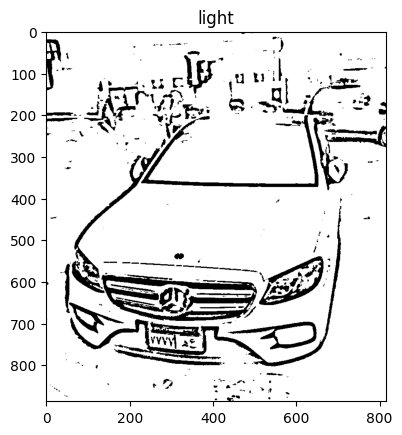

In [169]:
# next, find regions in the image that are light
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, squareKern, iterations=1)
light = cv2.adaptiveThreshold(light, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
show_images([light], ["light"])

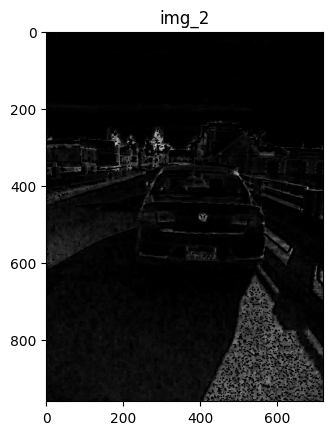

In [167]:
# and light with img_closed
img_2 = cv2.bitwise_and(light, img_closed)
show_images([img_2], ["img_2"])

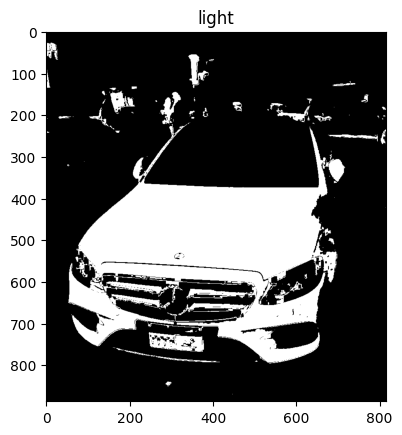

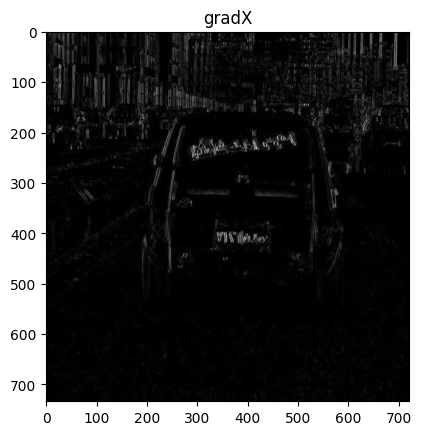

In [130]:
# apply sobel to detect vertical edges and then normalize gradients to range from 0 to 255
gradX = cv2.Sobel(img_blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
show_images([gradX], ["gradX"])

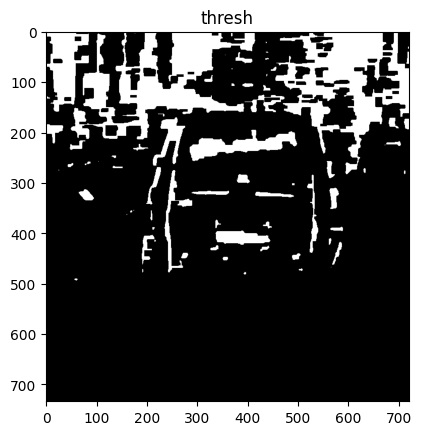

In [132]:
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
thresh = cv2.threshold(gradX, 0, 255,
			cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
show_images([thresh], ["thresh"])

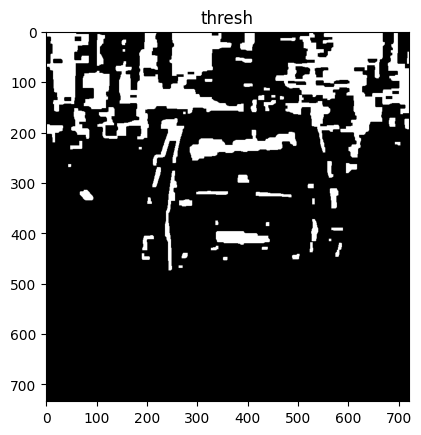

In [133]:
# perform a series of erosions and dilations to clean up the
		# thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
show_images([thresh], ["thresh"])

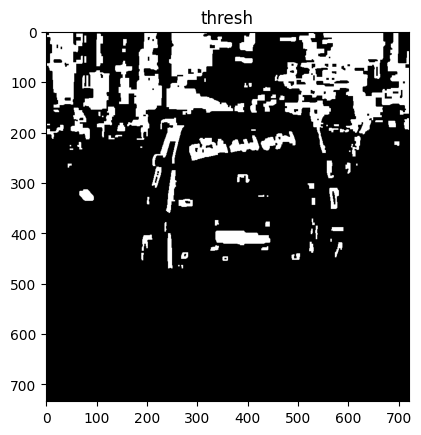

In [134]:
thresh = cv2.bitwise_and(thresh, thresh, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)
show_images([thresh], ["thresh"])

In [135]:
import imutils

In [136]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
			cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

309


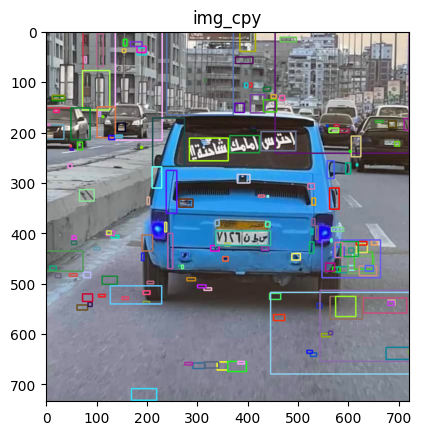

In [149]:
bounding_boxes = [cv2.boundingRect(contour) for contour in cnts]
img_cpy = img.copy()
for contour in bounding_boxes:
    x, y, w, h = contour
    aspect_ratio = w / h
    area = w * h
    if aspect_ratio >= 3.5 and aspect_ratio <= 4:
        filtered_contours.append(contour)
print(len(filtered_contours))
        
if filtered_contours:
    #draw each contour in a different color
    for i in range(len(filtered_contours)):
        #pick random color
        color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
        curr_contour = filtered_contours[i]
        #get bounding box
        x, y, w, h = curr_contour
        # make a rectangle around the contour
        cv2.rectangle(img_cpy, (x, y), (x + w, y + h), color, 2)  
    #get max contour
show_images([img_cpy], ["img_cpy"])

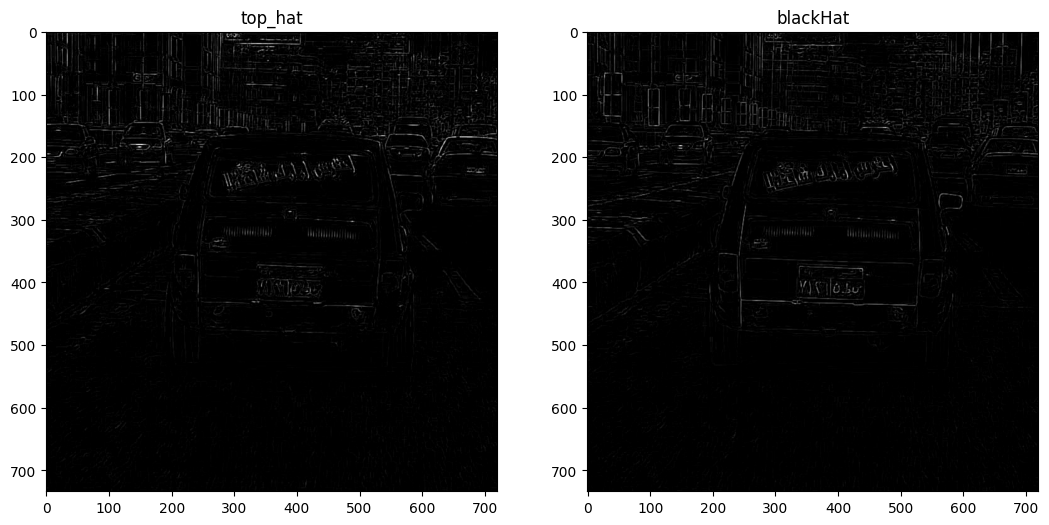

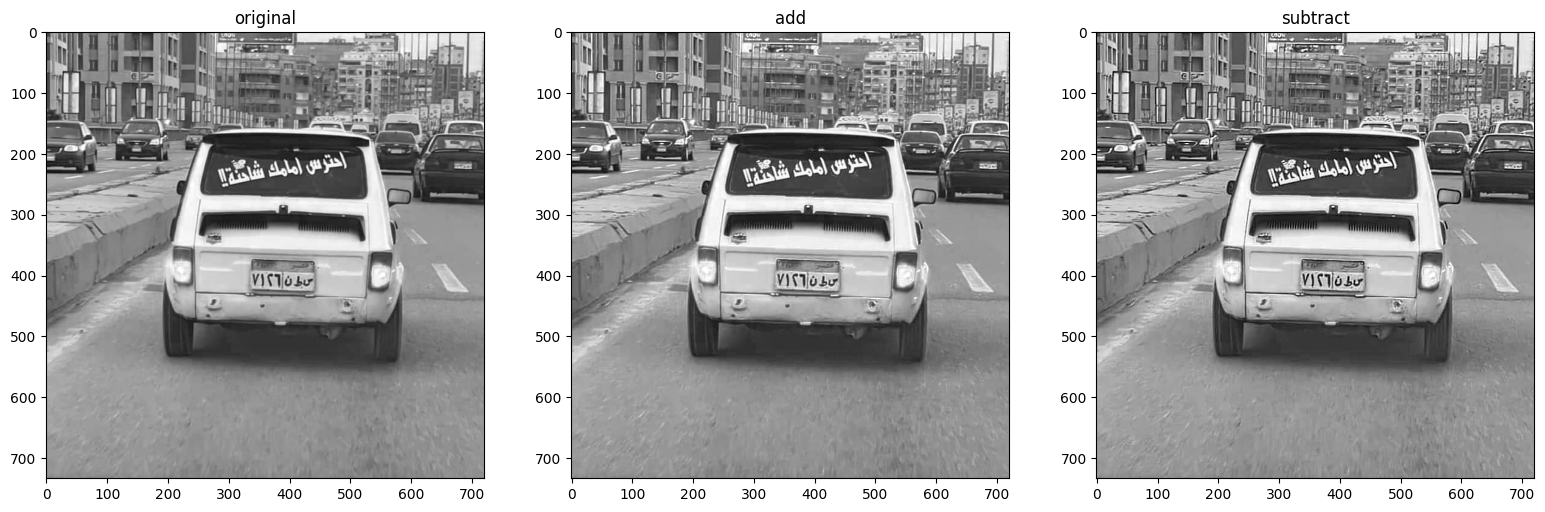

In [217]:
from TOOLS import *

import cv2
import numpy as np
import math




img = cv2.imread("Dataset\\Vehicles\\0001.jpg")

# cv2.imshow('original', img)
# cv2.imwrite(temp_folder + '1 - original.png', img)

# hsv transform - value = gray image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hue, saturation, value = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

# cv2.imshow('gray', value)
# cv2.imwrite(temp_folder + '2 - gray.png', value)

# kernel to use for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# applying topHat/blackHat operations
topHat = cv2.morphologyEx(value, cv2.MORPH_TOPHAT, kernel)
blackHat = cv2.morphologyEx(value, cv2.MORPH_BLACKHAT, kernel)
# cv2.imshow('topHat', topHat)
# cv2.imshow('blackHat', blackHat)
# cv2.imwrite(temp_folder + '3 - topHat.png', topHat)
# cv2.imwrite(temp_folder + '4 - blackHat.png', blackHat)

# add and subtract between morphological operations
add = cv2.add(value, topHat)
subtract = cv2.subtract(add, blackHat)
show_images([topHat,blackHat], ["top_hat","blackHat"])
show_images([value,add, subtract], ["original","add", "subtract"])


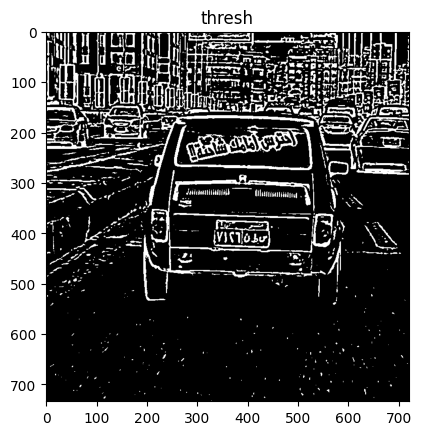

In [218]:
# cv2.imshow('subtract', subtract)
# cv2.imwrite(temp_folder + '5 - subtract.png', subtract)

# applying gaussian blur on subtract image
blur = cv2.GaussianBlur(subtract, (5, 5), 0)
# cv2.imshow('blur', blur)
# cv2.imwrite(temp_folder + '6 - blur.png', blur)

# thresholding
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 19, 9)
# cv2.imshow('thresh', thresh)
# cv2.imwrite(temp_folder + '7 - thresh.png', thresh)

show_images([thresh], ["thresh"])



In [199]:
cv2MajorVersion = cv2.__version__.split(".")[0]
print(cv2MajorVersion)

4


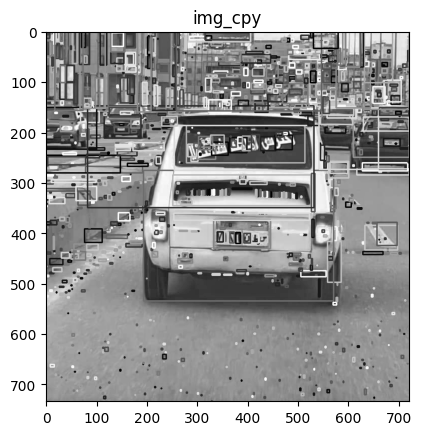

In [219]:


contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img_cpy = value.copy()
#draw each contour in a different color
for i in range(len(contours)):
    #pick random color
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
    curr_contour = contours[i]
    #get bounding box
    x, y, w, h = cv2.boundingRect(curr_contour)
    # make a rectangle around the contour
    cv2.rectangle(img_cpy, (x, y), (x + w, y + h), color, 2)  
    #get max contour
show_images([img_cpy], ["img_cpy"])


In [220]:
# get height and width
height, width = thresh.shape

# create a numpy array with shape given by threshed image value dimensions
imageContours = np.zeros((height, width, 3), dtype=np.uint8)

# list and counter of possible chars
possibleChars = []
countOfPossibleChars = 0

# loop to check if any (possible) char is found
for i in range(0, len(contours)):

    # draw contours based on actual found contours of thresh image
    cv2.drawContours(imageContours, contours, i, (255, 255, 255))

    # retrieve a possible char by the result ifChar class give us
    possibleChar = ifChar(contours[i])

    # by computing some values (area, width, height, aspect ratio) possibleChars list is being populated
    if checkIfChar(possibleChar) is True:
        countOfPossibleChars = countOfPossibleChars + 1
        possibleChars.append(possibleChar)


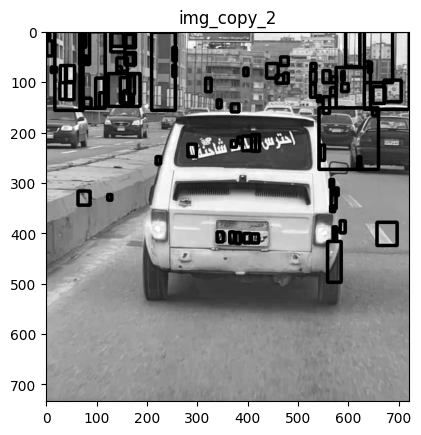

In [221]:
#draw each contour of possible chars in a different color
img_copy_2 = value.copy()
for i in range(len(possibleChars)):
    #pick random color
    color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
    curr_contour = possibleChars[i].contour
    #get bounding box
    x, y, w, h = cv2.boundingRect(curr_contour)
    # make a rectangle around the contour
    cv2.rectangle(img_copy_2, (x, y), (x + w, y + h), (0,0,0), 5)  
    #get max contour
show_images([img_copy_2], ["img_copy_2"])

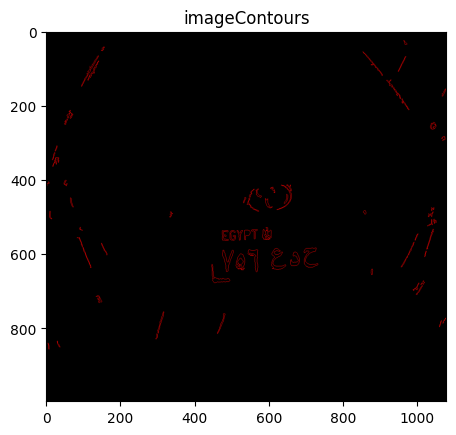

In [216]:

imageContours = np.zeros((height, width, 3), np.uint8)

ctrs = []

# populating ctrs list with each char of possibleChars
for char in possibleChars:
    ctrs.append(char.contour)

cv2.drawContours(imageContours, ctrs, -1, (255, 0, 0))
show_images([imageContours], ["imageContours"])

C:\Users\SMS\AppData\Local\Temp\ipykernel_22164\2661209742.py:160: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  cv2.drawContours(img, [np.int0(p2fRectPoints)], -1, rectColour, 2)


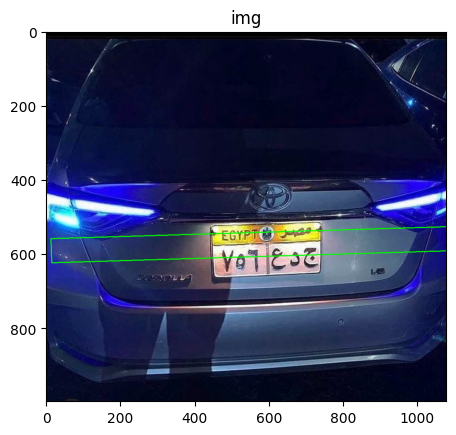

In [207]:
plates_list = []
listOfListsOfMatchingChars = []

for possibleC in possibleChars:

    # the purpose of this function is, given a possible char and a big list of possible chars,
    # find all chars in the big list that are a match for the single possible char, and return those matching chars as a list
    def matchingChars(possibleC, possibleChars):
        listOfMatchingChars = []

        # if the char we attempting to find matches for is the exact same char as the char in the big list we are currently checking
        # then we should not include it in the list of matches b/c that would end up double including the current char
        # so do not add to list of matches and jump back to top of for loop
        for possibleMatchingChar in possibleChars:
            if possibleMatchingChar == possibleC:
                continue

            # compute stuff to see if chars are a match
            distanceBetweenChars1 = distanceBetweenChars(possibleC, possibleMatchingChar)

            angleBetweenChars1 = angleBetweenChars(possibleC, possibleMatchingChar)

            changeInArea = float(abs(possibleMatchingChar.boundingRectArea - possibleC.boundingRectArea)) / float(
                possibleC.boundingRectArea)

            changeInWidth = float(abs(possibleMatchingChar.boundingRectWidth - possibleC.boundingRectWidth)) / float(
                possibleC.boundingRectWidth)

            changeInHeight = float(abs(possibleMatchingChar.boundingRectHeight - possibleC.boundingRectHeight)) / float(
                possibleC.boundingRectHeight)

            # check if chars match
            if distanceBetweenChars1 < (possibleC.diagonalSize * 5) and \
                    changeInArea < 0.8 and \
                    changeInWidth < 0.8 and \
                    changeInHeight < 0.2:
                listOfMatchingChars.append(possibleMatchingChar)
                

        return listOfMatchingChars


    # here we are re-arranging the one big list of chars into a list of lists of matching chars
    # the chars that are not found to be in a group of matches do not need to be considered further
    listOfMatchingChars = matchingChars(possibleC, possibleChars)

    listOfMatchingChars.append(possibleC)

    # if current possible list of matching chars is not long enough to constitute a possible plate
    # jump back to the top of the for loop and try again with next char
    if len(listOfMatchingChars) < 3:
        continue

    # here the current list passed test as a "group" or "cluster" of matching chars
    listOfListsOfMatchingChars.append(listOfMatchingChars)

    # remove the current list of matching chars from the big list so we don't use those same chars twice,
    # make sure to make a new big list for this since we don't want to change the original big list
    listOfPossibleCharsWithCurrentMatchesRemoved = list(set(possibleChars) - set(listOfMatchingChars))

    recursiveListOfListsOfMatchingChars = []

    for recursiveListOfMatchingChars in recursiveListOfListsOfMatchingChars:
        listOfListsOfMatchingChars.append(recursiveListOfMatchingChars)

    break

imageContours = np.zeros((height, width, 3), np.uint8)

for listOfMatchingChars in listOfListsOfMatchingChars:
    contoursColor = (255, 0, 255)

    contours = []

    for matchingChar in listOfMatchingChars:
        contours.append(matchingChar.contour)

    cv2.drawContours(imageContours, contours, -1, contoursColor)

# cv2.imshow("finalContours", imageContours)
# cv2.imwrite(temp_folder + '10 - finalContours.png', imageContours)

for listOfMatchingChars in listOfListsOfMatchingChars:
    possiblePlate = PossiblePlate()

    # sort chars from left to right based on x position
    listOfMatchingChars.sort(key=lambda matchingChar: matchingChar.centerX)

    # calculate the center point of the plate
    plateCenterX = (listOfMatchingChars[0].centerX + listOfMatchingChars[len(listOfMatchingChars) - 1].centerX) / 2.0
    plateCenterY = (listOfMatchingChars[0].centerY + listOfMatchingChars[len(listOfMatchingChars) - 1].centerY) / 2.0

    plateCenter = plateCenterX, plateCenterY

    # calculate plate width and height
    plateWidth = int((listOfMatchingChars[len(listOfMatchingChars) - 1].boundingRectX + listOfMatchingChars[
        len(listOfMatchingChars) - 1].boundingRectWidth - listOfMatchingChars[0].boundingRectX) * 1.3)

    totalOfCharHeights = 0

    for matchingChar in listOfMatchingChars:
        totalOfCharHeights = totalOfCharHeights + matchingChar.boundingRectHeight

    averageCharHeight = totalOfCharHeights / len(listOfMatchingChars)

    plateHeight = int(averageCharHeight * 1.5)

    # calculate correction angle of plate region
    opposite = listOfMatchingChars[len(listOfMatchingChars) - 1].centerY - listOfMatchingChars[0].centerY

    hypotenuse = distanceBetweenChars(listOfMatchingChars[0],
                                                listOfMatchingChars[len(listOfMatchingChars) - 1])
    correctionAngleInRad = math.asin(opposite / hypotenuse)
    correctionAngleInDeg = correctionAngleInRad * (180.0 / math.pi)

    # pack plate region center point, width and height, and correction angle into rotated rect member variable of plate
    possiblePlate.rrLocationOfPlateInScene = (tuple(plateCenter), (plateWidth, plateHeight), correctionAngleInDeg)

    # get the rotation matrix for our calculated correction angle
    rotationMatrix = cv2.getRotationMatrix2D(tuple(plateCenter), correctionAngleInDeg, 1.0)

    height, width, numChannels = img.shape

    # rotate the entire image
    imgRotated = cv2.warpAffine(img, rotationMatrix, (width, height))

    # crop the image/plate detected
    imgCropped = cv2.getRectSubPix(imgRotated, (plateWidth, plateHeight), tuple(plateCenter))

    # copy the cropped plate image into the applicable member variable of the possible plate
    possiblePlate.Plate = imgCropped

    # populate plates_list with the detected plate
    if possiblePlate.Plate is not None:
        plates_list.append(possiblePlate)

    # draw a ROI on the original image
    for i in range(0, len(plates_list)):
        # finds the four vertices of a rotated rect - it is useful to draw the rectangle.
        p2fRectPoints = cv2.boxPoints(plates_list[i].rrLocationOfPlateInScene)

        # roi rectangle colour
        rectColour = (0, 255, 0)
        cv2.drawContours(img, [np.int0(p2fRectPoints)], -1, rectColour, 2)
    
        show_images([img], ["img"])
        